# Gaussian integral

We have to check, using Monte Carlo integration, that:

$$\int_{0}^{\infty} x^3 \exp\bigg(-\frac{x^2}{2\sigma^2}\bigg)dx = 2\sigma^4 $$

Monte Carlo method relies on the fact that if I have an integral of this kind:

$$ \int_{a}^{b}f(x)p(x) dx $$

where $p(x)$ is a function I can sample, and $f(x)$ is a function that I'm able to evaluate at each point, then:

$$ \int_{a}^{b}f(x)p(x) \sim \frac{1}{N} \sum_{i=1}^{N}{f(x_{i})} $$

where $x_{i}$ are samples drawn from $p$.

So the integrand written before can be written as: 

$$ \int_{0}^{\infty}{f(x)p(x)} dx = \int_{0}^{\infty} {\frac{\sigma\sqrt{2 \pi}}{2} x^3 \cdot 2\mathrm{Gauss}(\mu = 0; \sigma)} dx$$

where $p(x)$ is a Gaussian function, normalised such that the integral between 0 and $\infty$ gives 1:

$$p(x) = 2 \mathrm{Gauss}(\mu = 0; \sigma) $$

$$f(x) = \frac {\sigma\sqrt{2 \pi}}{2} x^3$$

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

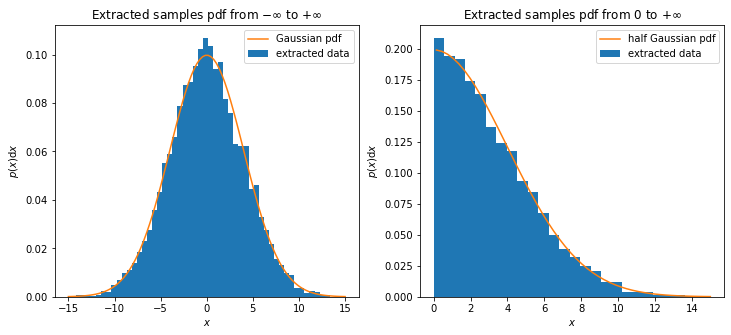

In [54]:
mean_g = 0   #gaussian mean
sigma_g = 4  #gaussian sigma
N = 10000    #number of extractions

distg = norm(loc = 0, scale = 4)  #gaussian
x_rand = distg.rvs(N)             #random extraction from the normal distribution

fig, ax = plt.subplots(1,2,figsize=(12,5))
xaxis = np.linspace(-15, 15, 100)
ax[0].hist(x_rand, bins=50, density=True, label='extracted data') 
ax[0].plot(xaxis, distg.pdf(xaxis), label='Gaussian pdf')
ax[0].set_title('Extracted samples pdf from $-\infty$ to $+\infty$')
ax[0].set_xlabel('$x$')
ax[0].set_ylabel('$p(x)\mathrm{d}x$')
ax[0].legend()

x_rand_pos = np.abs(x_rand)  #to take only the positive values, since the gaussian is symmetric, I take the absolute values of 
                             #the sample. This method is also guaranteeing us that we are not losing any data
ax[1].hist(x_rand_pos, density = True, bins = 25, label='extracted data' )
ax[1].plot(xaxis[xaxis>0], 2*distg.pdf(xaxis[xaxis>0]), label='half Gaussian pdf') #multiply by two the given pdf
ax[1].set_title('Extracted samples pdf from $0$ to $+\infty$')
ax[1].set_xlabel('$x$')
ax[1].set_ylabel('$p(x)\mathrm{d}x$')
ax[1].legend()

In [55]:
#computin the integral with the Mont Carlo method
integral = np.sum(x_rand_pos**3*sigma_g*np.sqrt(np.pi/2))/len(x_rand_pos)
print('The result of the Monte Carlo integral is: %.3f' %integral)

#analytic result
true_res = 2*sigma_g**4
print('The true result is: ', true_res)

The result of the Monte Carlo integral is: 505.974
The true result is:  512


The two results are similar!

Now, since the process relies on a random extraction we could ask: **what happens if I consider different extractions?**
So considering the same number $N$ how are the Monte Carlo integrals distributed?

In [66]:
#repeating the same process as before 10000 times
results=np.zeros(10000) 
np.random.seed(45)
for i in range(len(results)):
    x_rand_pos = np.abs(distg.rvs(N))
    results[i] = np.sum(x_rand_pos**3*sigma_g*np.sqrt(np.pi/2))/len(x_rand_pos)

Text(0, 0.5, 'frequency density')

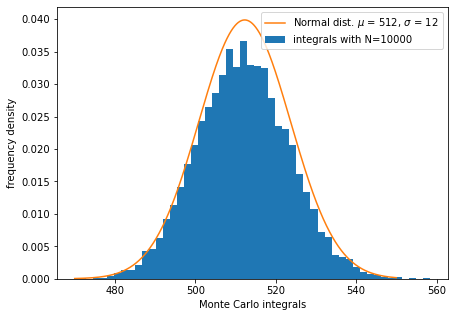

In [67]:
fig, ax = plt.subplots(1,1, figsize=(7,5))

ax.hist(results, density=True, bins=50, label='integrals with N=10000')

#overplotting a Gaussian with mean = 512
ax.plot(np.linspace(470, 550, 1000), norm(loc=517, scale=10).pdf(np.linspace(480, 550, 1000)), 
        label='Normal dist. $\mu$ = 512, $\sigma$ = 12')
ax.legend()
ax.set_xlabel('Monte Carlo integrals')
ax.set_ylabel('frequency density')


The data seem to be distributed as a Gaussian function, probably like the one overplotted on the data. In general I would say that the more times the process is repeated the more the function should resemble a clear Gaussian.

**What happens if we change the number of samples?**

In [78]:
#building a function to compute the same Monte Carlo integral with different N

N_tries = np.logspace(0,7,200,dtype = int) #the samples are from 1 to 10^7
integral_arr = np.zeros(len(N_tries))      #this array contains the M.C. integrals as a function of N
err = np.zeros(len(N_tries))

for i in range(len(N_tries)):
    x_rand = distg.rvs(N_tries[i])
    x_rand_pos = np.abs(x_rand)
    integral_arr[i] = np.sum(x_rand_pos**3*sigma_g*np.sqrt(np.pi/2))/len(x_rand_pos)
    err[i] = np.abs((integral_arr[i] - 2*sigma_g** 4)/(2*sigma_g**4))

Text(0, 0.5, 'Monte Carlo integral')

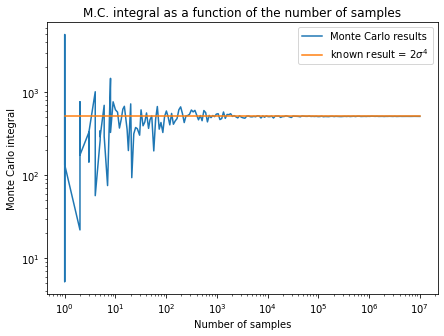

In [79]:
#plotting the integral value as a function of N_tries
fig, ax = plt.subplots(1,1, figsize=(7,5))
ax.plot(N_tries, integral_arr, label='Monte Carlo results')
xaxis = np.linspace(np.min(N_tries), np.max(N_tries), 1000)
ax.plot(xaxis, true_res +0*xaxis, label='known result = 2$\sigma^4$')
ax.set_yscale('log')
ax.set_xscale('log')
ax.legend()
ax.set_title('M.C. integral as a function of the number of samples')
ax.set_xlabel('Number of samples')
ax.set_ylabel('Monte Carlo integral')

Text(0, 0.5, 'Monte Carlo integral')

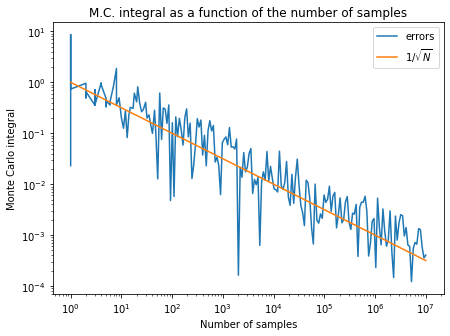

In [85]:
#plotting the error as a function of N_tries
fig, ax = plt.subplots(1,1, figsize=(7,5))
ax.plot(N_tries, err, label='errors')
xaxis = np.linspace(np.min(N_tries), np.max(N_tries), 1000)
ax.plot(N_tries, 1/N_tries**0.5, label='1/$\sqrt{N}$')
ax.set_yscale('log')
ax.set_xscale('log')
ax.legend()
ax.set_title('M.C. integral as a function of the number of samples')
ax.set_xlabel('Number of samples')
ax.set_ylabel('Monte Carlo integral')